In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline

# Homework 5

**Instructions:** Complete the notebook below. Download the completed notebook in HTML format. Upload assignment using Canvas.

**Due:** Feb. 20 at **12:30pm.**

## Exercise: AR(1) Process Simulation

For each of the AR(1) processes defined below:

1. Compute $y$ for $201$ periods (i.e., $t=0,\ldots, 200$).
2. Construct a well-labeled plot of $y$ for each simulation.
2. Print the mean and standard deviation of the stimulated process.

You may use the function from the Notebook for Lecture 10, write your own, or take a more brute force approach.

In [2]:
# Define a function for computing the first-order difference equation. CELL NOT PROVIDED
def ar1_sim(rho,sigma,y0,T,):
    '''Function for simulating an AR(1) process 
    
        y[t] = rho*y[t-1] + epsilon[t]
    
    Args:
        rho (float):    Autoregressive coefficient on y[t-1]
        sigma (float):  Standard deviation of epsilon
        y0 (float):     Initial value of the process
        T (int):        Number of periods to simulate including initial period
     
     Returns:
         NumPy ndarray
     '''
    
    y = np.zeros(T)
    epsilon = np.random.normal(scale=sigma,size=T)
    y[0] = y0
    for t in range(T-1):
        y[t+1] = rho*y[t]+epsilon[t+1]
    
    return y


# Create variable 'T' equal to number of simulation periods
T = 201

# Set NumPy RNG seed to 126 st that simulations look the same each time I run the Notebook
np.random.seed(126)

1. $y_{t} = 0.33 y_{t-1} + \epsilon_t, \; \; \; \; \epsilon \sim \mathcal{N}(0,1), \; \; \; \; y_0 = 0$

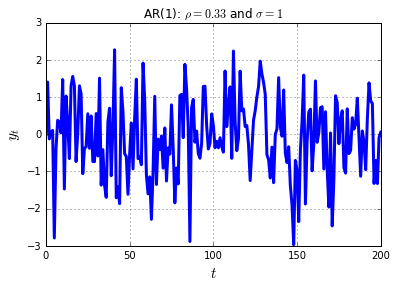

In [3]:
rho=0.33
sigma = 1
y0 = 0

y = ar1_sim(rho,sigma,y0,T)

plt.plot(y,lw=3)
plt.title('AR(1): $\\rho='+str(rho)+'$ and $\\sigma='+str(sigma)+'$')
plt.xlabel('$t$',fontsize=15)
plt.ylabel('$y_t$',fontsize=15)
plt.grid()

In [4]:
# print mean of y
print('mean of y:              ',round(y.mean(),4))

# Print standard deviation of y
print('standard deviation of y: ',round(y.std(),4))

mean of y:               -0.0743
standard deviation of y:  1.0322


2. $y_{t} = y_{t-1} + \epsilon_t, \; \; \; \; \epsilon \sim \mathcal{N}(0,1), \; \; \; \; y_0 = 0$

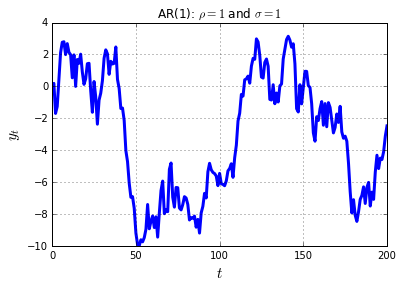

In [5]:
rho=1
sigma = 1
y0 = 0

y = ar1_sim(rho,sigma,y0,T)

plt.plot(y,lw=3)
plt.title('AR(1): $\\rho='+str(rho)+'$ and $\\sigma='+str(sigma)+'$')
plt.xlabel('$t$',fontsize=15)
plt.ylabel('$y_t$',fontsize=15)
plt.grid()

In [6]:
# print mean of y
print('mean of y:              ',round(y.mean(),4))

# Print standard deviation of y
print('standard deviation of y:',round(y.std(),4))

mean of y:               -3.0308
standard deviation of y: 3.8289


3. $y_{t} = -0.95 y_{t-1} + \epsilon_t, \; \; \; \; \epsilon \sim \mathcal{N}(0,1), \; \; \; \; y_0 = 0$

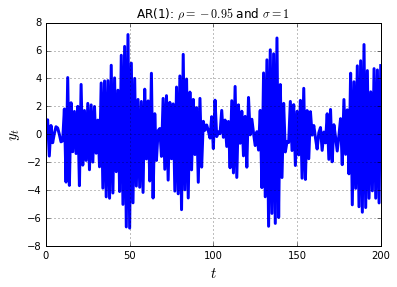

In [7]:
rho=-0.95
sigma = 1
y0 = 0

y = ar1_sim(rho,sigma,y0,T)

plt.plot(y,lw=3)
plt.title('AR(1): $\\rho='+str(rho)+'$ and $\\sigma='+str(sigma)+'$')
plt.xlabel('$t$',fontsize=15)
plt.ylabel('$y_t$',fontsize=15)
plt.grid()

In [8]:
# print mean of y
print('mean of y:              ',round(y.mean(),4))

# Print standard deviation of y
print('standard deviation of y: ',round(y.std(),4))

mean of y:               -0.0131
standard deviation of y:  3.1956


4. $y_{t} = 0.75 y_{t-1} + \epsilon_t , \; \; \; \; \epsilon \sim \mathcal{N}(0,4), \; \; \; \; y_0 = 20$

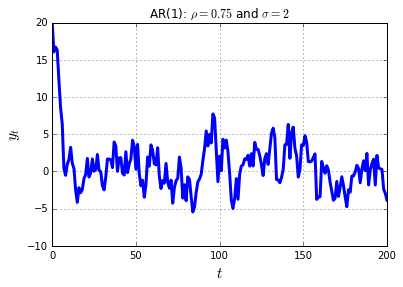

In [9]:
rho=0.75
sigma = 2
y0 = 20

y = ar1_sim(rho,sigma,y0,T)

plt.plot(y,lw=3)
plt.title('AR(1): $\\rho='+str(rho)+'$ and $\\sigma='+str(sigma)+'$')
plt.xlabel('$t$',fontsize=15)
plt.ylabel('$y_t$',fontsize=15)
plt.grid()

In [10]:
# print mean of y
print('mean of y:              ',round(y.mean(),4))

# Print standard deviation of y
print('standard deviation of y:',round(y.std(),4))

mean of y:               0.8346
standard deviation of y: 3.6313


5. $y_{t} = 0.9 y_{t-1} + \epsilon_t , \; \; \; \; \epsilon \sim \mathcal{N}(0,3), \; \; \; \; y_0 = 0$

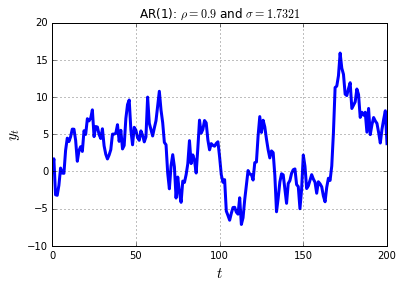

In [11]:
rho=0.9
sigma = np.sqrt(3)
y0 = 0

y = ar1_sim(rho,sigma,y0,T)

plt.plot(y,lw=3)
plt.title('AR(1): $\\rho='+str(rho)+'$ and $\\sigma='+str(round(sigma,4))+'$')
plt.xlabel('$t$',fontsize=15)
plt.ylabel('$y_t$',fontsize=15)
plt.grid()

In [12]:
# print mean of y
print('mean of y:              ',round(y.mean(),4))

# Print standard deviation of y
print('standard deviation of y: ',round(y.std(),4))

mean of y:               2.8525
standard deviation of y:  4.5849


## Exercise: Stochastic Growth

We've seen in class that total factory productivity (TFP) in the US fluctuates over the business cycle around a long-term growth trend. That is, total factor productivity is characterized by *stochastic growth*. In this problem, you will simulate a model of TFP with stochastic growth.

### Background

Suppose that the trend component of TFP $A^{trend}$ grows smoothly at the constant rate $g$:

\begin{align}
A^{trend}_t & = (1+g)A_{t-1}^{trend}, \tag{1}
\end{align}

where $A_0$ is given. The log-deviations of actual TFP $A$ from trend TFP are determined according to an AR(1) process:

\begin{align}
\log\left(A_t/A^{trend}_t\right) & = \rho \log \left(A_{t-1} / A^{trend}_{t-1}\right) + \epsilon_t, \tag{2}
\end{align}

where $A_0$ is given and $\epsilon_t \sim \mathcal{N}(0,\sigma^2)$. Solve quation (2) for $A_t$ to get an expression for $A_t$ in terms of $A_{t-1}$, $A^{trend}_{t}$, $A^{trend}_{t-1}$, and $\epsilon_t$:

\begin{align}
A_t & = A^{trend}_t \displaystyle e^{\rho \log \left(A_{t-1} / A^{trend}_{t-1}\right) + \epsilon_t} \tag{3}
\end{align}

### Simulation

To simulate this model:

1. Specify values for $A_0$ and $A^{trend}_0$.
2. For $t = 0, 1, \ldots... T$, compute $A^{trend}_{t+1}$ using equation (1) and then compute $A_{t+1}$ using equation (3)

Use the following prameter values for this simulation


| $A^{trend}_0$ | $A_0$ | $g$  | $\rho$ | $\sigma$ | $T$ |
|---------------|-------|------|--------|----------|-----|
| 1             | 1     | 0.02 | 0.7    | 0.025    | 101 |

In the follwing cell, simulate $A^{trend}$ and $A$ using the parameter values provided.

In [13]:
# Simulate the stochastic growth model of TFP
T = 101
g = 0.02
rho = 0.7
sigma = 0.025

epsilon = np.random.normal(scale=sigma,size=T)
a_trend = np.ones(T)*1
a = np.ones(T)*1

for t in range(T-1):
    a_trend[t+1] = (1+g)*a_trend[t]
    a[t+1] = a_trend[t+1]*np.exp(rho*np.log(a[t]/a_trend[t])+epsilon[t])

Contruct a well-labeled plot of the simulated values of $A$ and $A^{trend}$

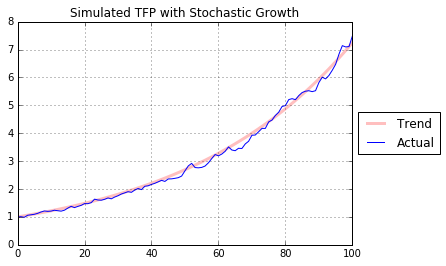

In [14]:
# Construct a plot of simulated TFP with its trend with:
#    1. Actual line: blue with lw=1, alpha=0.7, label = 'actual'
#    2. Trend line:  red with lw=3, alpha=0.25, label = 'trend'
plt.plot(a_trend,'r',lw=3,alpha=0.25,label='Trend')
plt.plot(a,label='Actual')
plt.title('Simulated TFP with Stochastic Growth')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid()

Contruct a well-labeled plot of the simulated values of $\log \left(A/A^{trend}\right)$

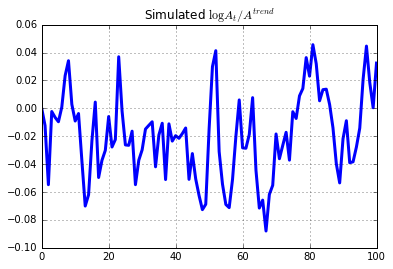

In [15]:
# Construct a plot of simulated log deviation of TFP from trend
plt.plot(np.log(a/a_trend),lw=3)
plt.title('Simulated $\log A_t/A^{trend}$')
plt.grid()

Compute the mean and standard deviation of $\log \left(A/A^{trend}\right)$

In [16]:
# print mean of log(A/A trend)
print('mean of log(A/A trend):              ',round((np.log(a/a_trend)).mean(),4))

# Print standard deviation of log(A/A trend)
print('standard deviation of log(A/A trend): ',round((np.log(a/a_trend)).std(),4))

mean of log(A/A trend):               -0.0192
standard deviation of log(A/A trend):  0.03


## Exercise: Questions for Prescott (1983) Reading


The following questions are about Edward Prescott's 1986 article "Theory  Ahead of Business Cycle Measurement" from the Fall 1986 issue of the Minneapolis Fed's *Quarterly Review* (link to article: [https://www.minneapolisfed.org/research/qr/qr1042.pdf](https://www.minneapolisfed.org/research/qr/qr1042.pdf)). The article is a summary of the research agenda of the author, his main collaborator, Finn Kydland, and others. That agenda entailed incorporating stochastic growth of TFP into the neoclassical growth model (essentially a Solow model but with the saving rate determined as a consequence a of utility maximization problem) as a way of modeling business cycle fluctuations. This line of research would later be called *real business cycle* theory.

The below questions are specifically about:
* Pages 9-11 (including the table on page 12)
* The final paragraph on page 21

**Question:** On page 10, Prescott writes that the "models constructed within this theoretical framework are necessarily highly abstract. Consequently they are necessarily false." What does Kydland mean by this? In what sense are abstract models necessarily false? 

**Answer**

All theoretical models are approximations of reality and therefore will not relfect the complexity of the natural environment. But that doesn't mean that abstract models can't be useful. In fact, abstraction helps us understand complicated phenomena by emphasizing only the most relevant aspects of the issue. <!-- answer -->

**Question:** On page 10, Prescott lists two reasons for why he doesn't like the term *business cycle*. What is the first reason and what does it mean?

**Answer**

The first reason that Prescott doesn't like the term *business cyle* is that it implies that short-term fluctuations are the result of economic forces that are *independent* of long-term growth. In Prescott's view, short-term fluctuations and long-term growth *are a consequence of the same process*: stochastic TFP growth. That is, TFP grows, but at a random and unpredictable rate.<!-- answer -->

**Question:** Table 1 on page 12 shows that household consumption measures in the US fluctuate less than investment measures. What is the intuition for why consumption varies less than investment?

**Answer**

People like to smooth their consumption over time as much as they can. When houseohlds have higher-than-average income, they save most for the future and so investment rises more than consumption when incomes are high. And when household incomes are lower-than-average, households primarily reduce saving and investment falls more than consumption when incomes are high.<!-- answer -->

**Question:** In the last paragraph of page 21, to what does Prescott attribute economic fluctuations? Can you think of any reasons why this statement was, and still is, controversial?

**Answer**

"Economic fluctuations are the optimal responses to uncertainty in the rate of technological change." The statement is controversial for several reasons. <!-- answer -->
* First, the argument attributes *all* economic fluctuations to TFP variation and disregards other plausible candidates like, for example, exogenous variation in monetary policy. <!-- answer -->
* Second, Prescott's claim that fluctuations are *optimal* implies that the economy is *always* doing the best it can with what it has: When unemployment is high, it's because TFP fell relative to trend and households decided to take more leisure. <!-- answer -->
* Third, the statement implies that, even in principle, policymakers cannot improve the welfare of the public by stabilizing the business cycle. <!-- answer -->